<a href="https://colab.research.google.com/github/SatAi999/CodeDais_Projects/blob/main/Heart_Disease_Detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [6]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart.csv


In [7]:
df = pd.read_csv("heart.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (10000, 15)
   Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholesterol  \
0   42    0                0                     103          246   
1   78    1                0                     164          323   
2   40    1                0                     197          212   
3   22    0                2                     121          306   
4   57    1                1                     134          284   

   Fasting Blood Sugar  Resting Electrocardiographic Results  \
0                    1                                     0   
1                    1                                     1   
2                    0                                     1   
3                    0                                     1   
4                    0                                     2   

   Maximum Heart Rate Achieved  Exercise Induced Angina  \
0                          147                        1   
1                          170                        0

In [8]:
X = df.drop(columns=['Heart Disease Type'])
y = df['Heart Disease Type']

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [13]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 21)                  │           1,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,893 (187.08 KB)

 Trainable params: 47,125 (184.08 KB)

 Non-trainable params: 768 (3.00 KB)

In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1995 - loss: 3.1908 - val_accuracy: 0.5375 - val_loss: 1.5578
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5323 - loss: 1.6155 - val_accuracy: 0.5387 - val_loss: 1.4724
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5226 - loss: 1.5763 - val_accuracy: 0.5431 - val_loss: 1.4687
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5391 - loss: 1.5123 - val_accuracy: 0.5387 - val_loss: 1.4726
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5361 - loss: 1.5065 - val_accuracy: 0.5419 - val_loss: 1.4730
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5368 - loss: 1.5034 - val_accuracy: 0.5431 - val_loss: 1.4693
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5445 - loss: 1.4712 - val_accuracy: 0.5412 - val_loss: 1.4687
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5445 - loss: 1.4685 - val_accu

In [16]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5367 - loss: 1.4748

✅ Test Accuracy: 0.5330


In [17]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [18]:
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)


Classification Report:
                             precision    recall  f1-score   support

            Aortic Aneurysm       0.04      0.08      0.05        48
                 Arrhythmia       0.07      0.11      0.09        46
        Atrial Fibrillation       0.00      0.00      0.00        46
             Cardiac Arrest       0.07      0.09      0.08        53
             Cardiomyopathy       0.09      0.08      0.08        52
   Congenital Heart Disease       0.04      0.04      0.04        49
    Coronary Artery Disease       0.07      0.24      0.11        54
               Endocarditis       0.00      0.00      0.00        47
               Heart Attack       0.00      0.00      0.00        51
              Heart Failure       0.00      0.00      0.00        43
        Heart Valve Disease       0.02      0.02      0.02        50
               Hypertension       0.00      0.00      0.00        48
Hypertrophic Cardiomyopathy       0.09      0.05      0.07        56
      Mit

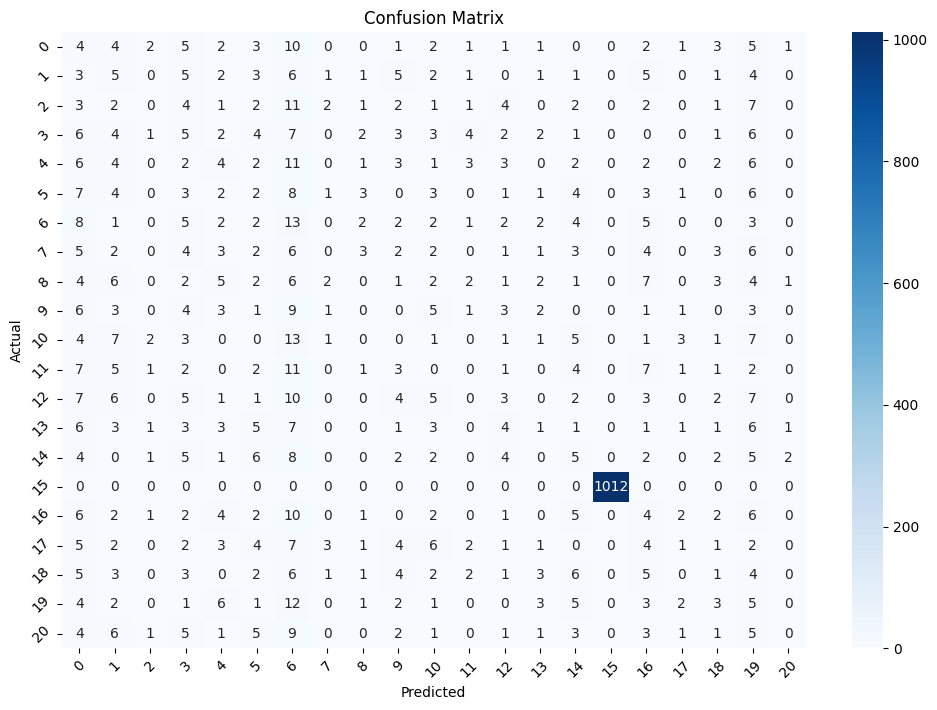

In [19]:
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("Confusion Matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

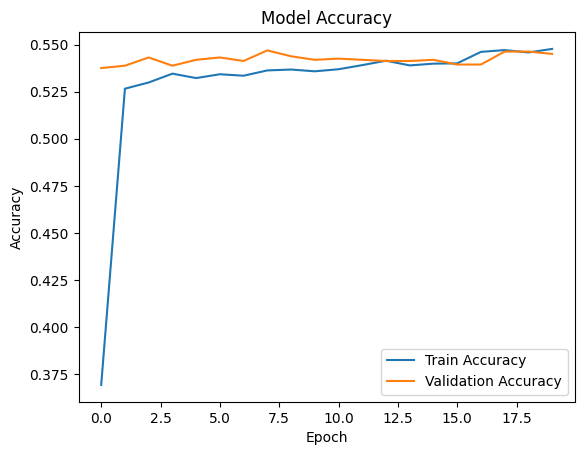

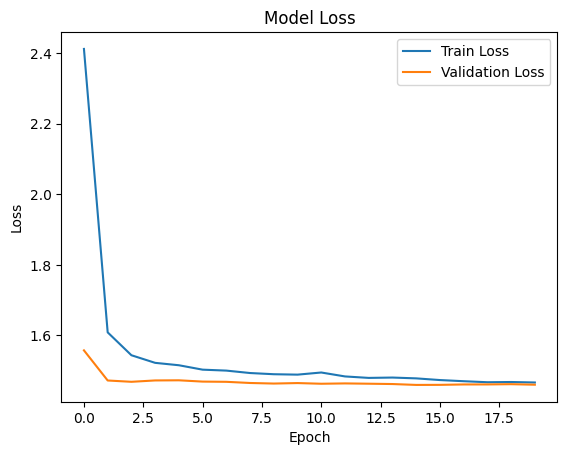

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()